# Read data and save as .mat for future re-load

In [1]:
import pybamm as pb;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
fs=17;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)
import openpyxl
import traceback
import multiprocessing

In [ ]:
# define function to read data: input: cell name, output: a dictionary with all data
def Read_One_Cell(cell_name):
    if cell_name in ['A','B','C']:
        tem = 10
    elif cell_name in ['D','E']:
        tem = 25
    elif cell_name in ['F','G','H']:
        tem = 40
    else:
        print('Cell does not exsit');
        tem = 0
    mydict = {};
    if tem:
        BasicPath= 'D:/OneDrive - Imperial College London/PhD Study/Imperial Study/Model/LG M50 Data/Exp-5 Extracted Data-from Niall/';
        Cap_path= f'Expt 5 - cell {cell_name} ({tem}degC) - Extracted Data.csv';
        Vol_path= f'0.1C Voltage Curves/Cell {cell_name}/';
        # Get capacity 
        Cap_all_0 = pd.read_csv(BasicPath+ Cap_path, sep =',' , header=None).to_numpy()
        Cap_all_0 = Cap_all_0[1:,:];
        [m,n]     = np.shape(Cap_all_0);
        Cap_all_1 = np.full(Cap_all_0.shape,0.0);
        for i in range(0,m):
            for j in range(0,n):
                Cap_all_1[i,j] = np.float64(Cap_all_0[i,j]);
        mydict[f'{cell_name}_Cap_all'] = Cap_all_1
        """ Index_G     = Cap_all_1[:,1]; # simple index, 0,1,2,,,
        AgeCycles_G = Cap_all_1[:,2]; # ageing cycles,0,78,...1170
        CapThroup_G = Cap_all_1[:,3]; # Charge Throughput (A.h) - capacity throughput! not only charge 
        Cap_C_10_G  = Cap_all_1[:,5]/1e3; # C/10 capacity
        Cap_C_2_G   = Cap_all_1[range(0,np.size(Cap_C_10_G),2),6]/1e3; # C/2 capacity    """  

        # Get voltage
        Time_Exp_All_G =[];  Vol_Exp_All_G =[];  Cur_Exp_All_G =[]; Charge_Exp_All_G =[]; Temp_Exp_All_G =[]; 
        for i in range(0,16):
            Specific_Path = f'Expt 5 - cell {cell_name} - RPT' +  str(i)  + ' - 0.1C discharge data.csv';
            Vol_all_0 = pd.read_csv(BasicPath+ Vol_path+ Specific_Path, sep =',' , header=None).to_numpy()
            Vol_all_0 = Vol_all_0[1:,:];
            [m,n]     = np.shape(Vol_all_0);
            Vol_all_1 = np.full(Vol_all_0.shape,0.0);
            for k in range(0,m):
                for j in range(0,n):
                    Vol_all_1[k,j] = np.float64(Vol_all_0[k,j]);
            if i==0 or i == 15: # save only the firts and last RPT cycle 
                mydict[f'{cell_name}_Vol_RPT_{i}'] = Vol_all_1
            """ Time         = Vol_all_1[:,0]/3600; Time = Time - Time[0];   
            Time_Exp_All_G  .append(Time);
            Vol_Exp_All_G   .append(Vol_all_1[:,1]) ;
            Cur_Exp_All_G   .append(Vol_all_1[:,2]) ;
            Charge_Exp_All_G .append(Vol_all_1[:,3]/1e3); # in mAh
            Temp_Exp_All_G  .append(Vol_all_1[:,4])   ; #  """
    return mydict

In [ ]:
# call the function and save data
All_cell = ['A','B','C','D','E','F','G','H']
Dict_all = {};
for cell in All_cell:
    mydict = Read_One_Cell(cell)
    Dict_all = {**Dict_all, **mydict};
BasicPath= 'D:/OneDrive - Imperial College London/PhD Study/Imperial Study/Model/LG M50 Data/Exp-5 Extracted Data-from Niall/';
savemat(BasicPath + 'Extracted_all_cell.mat',Dict_all)   

In [ ]:
# Reload data:    A_Cap_all  A_Vol_RPT_0 A_Vol_RPT_15
"""Index_G     = Cap_all[:,1]; # simple index, 0,1,2,,,
AgeCycles_G = Cap_all[:,2]; # ageing cycles,0,78,...1170
CapThroup_G = Cap_all[:,3]; # Charge Throughput (A.h) - capacity throughput! not only charge 
Cap_C_10_G  = Cap_all[:,5]/1e3; # C/10 capacity
Cap_C_2_G   = Cap_all[range(0,np.size(Cap_C_10_G),2),6]/1e3; # C/2 capacity  
Time         = Vol_all_1[:,0]/3600; Time = Time - Time[0];   
Time_Exp_All_G  .append(Time);
Vol_Exp_All_G   .append(Vol_all_1[:,1]) ;
Cur_Exp_All_G   .append(Vol_all_1[:,2]) ;
Charge_Exp_All_G .append(Vol_all_1[:,3]/1e3); # in mAh
Temp_Exp_All_G  .append(Vol_all_1[:,4])   ; #    """ 
Niall_data = loadmat(BasicPath + 'Extracted_all_cell.mat')


In [2]:
# test in folder:
Niall_data = loadmat( 'Extracted_all_cell.mat')


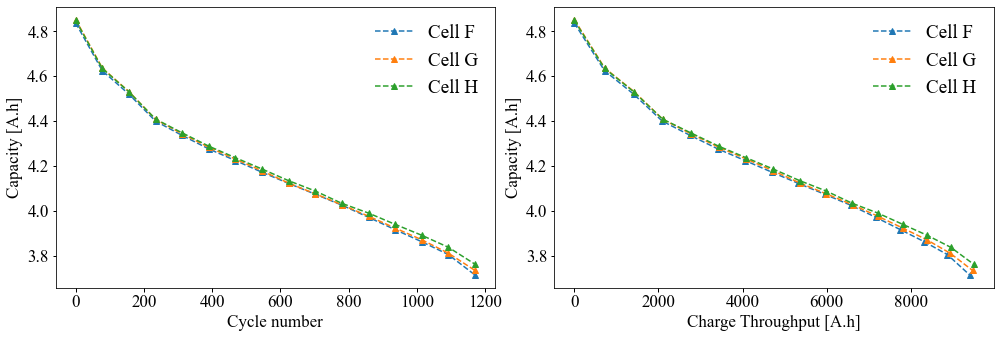

In [5]:
Num_subplot = 2
Niall_data = loadmat( 'Extracted_all_cell.mat')
fig, axs = plt.subplots(1,Num_subplot, figsize=(14,4.8),tight_layout=True)
axs[0].plot(Niall_data['F_Cap_all'][:,2],Niall_data['F_Cap_all'][:,5]/1e3, '--^',  label='Cell F' )
axs[0].plot(Niall_data['G_Cap_all'][:,2],Niall_data['G_Cap_all'][:,5]/1e3, '--^',  label='Cell G' )
axs[0].plot(Niall_data['H_Cap_all'][:,2],Niall_data['H_Cap_all'][:,5]/1e3, '--^',  label='Cell H' )
axs[1].plot(Niall_data['F_Cap_all'][:,3],Niall_data['F_Cap_all'][:,5]/1e3, '--^',  label='Cell F' )
axs[1].plot(Niall_data['G_Cap_all'][:,3],Niall_data['G_Cap_all'][:,5]/1e3, '--^',  label='Cell G' )
axs[1].plot(Niall_data['H_Cap_all'][:,3],Niall_data['H_Cap_all'][:,5]/1e3, '--^',  label='Cell H' )

axs[0].set_xlabel("Cycle number",   fontdict={'family':'Times New Roman','size':fs})
axs[1].set_xlabel("Charge Throughput [A.h]",   fontdict={'family':'Times New Roman','size':fs})
for i in range(0,Num_subplot):
    axs[i].set_ylabel("Capacity [A.h]",   fontdict={'family':'Times New Roman','size':fs})
    labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); [label.set_fontname('Times New Roman') for label in labels]
    axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
    axs[i].legend(prop={'family':'Times New Roman','size':fs+2},loc='best',frameon=False)


In [3]:
for key in Niall_data.keys():
    print(key)

__header__
__version__
__globals__
A_Cap_all
A_Vol_RPT_0
A_Vol_RPT_15
B_Cap_all
B_Vol_RPT_0
B_Vol_RPT_15
C_Cap_all
C_Vol_RPT_0
C_Vol_RPT_15
D_Cap_all
D_Vol_RPT_0
D_Vol_RPT_15
E_Cap_all
E_Vol_RPT_0
E_Vol_RPT_15
F_Cap_all
F_Vol_RPT_0
F_Vol_RPT_15
G_Cap_all
G_Vol_RPT_0
G_Vol_RPT_15
H_Cap_all
H_Vol_RPT_0
H_Vol_RPT_15


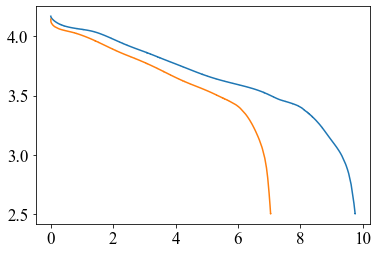

In [8]:

Vol_all_1 = Niall_data['A_Vol_RPT_0'];
Time_1= Niall_data['A_Vol_RPT_0'][:,0]/3600; 
Time_1 = Time_1 - Time_1[0];   
Time_15 =Niall_data['A_Vol_RPT_15'][:,0]/3600; 
Time_15 = Time_15 - Time_15[0];   

plt.plot(Time_1 ,Niall_data['A_Vol_RPT_0'][:,1])
plt.plot(Time_15,Niall_data['A_Vol_RPT_15'][:,1])


###################### old script:  Load Niall cell G 
BasicPath= 'D:/OneDrive - Imperial College London/PhD Study/Imperial Study/Model/LG M50 Data/Exp-5 Extracted Data-from Niall/';
Cap_path= 'Expt 5 - cell G (40degC) - Extracted Data.csv';
Vol_path= '0.1C Voltage Curves/Cell G/';
for mm in range(0,1):
    # Get capacity 
    Cap_all_0 = pd.read_csv(BasicPath+ Cap_path, sep =',' , header=None).to_numpy()
    Cap_all_0 = Cap_all_0[1:,:];
    [m,n]     = np.shape(Cap_all_0);
    Cap_all_1 = np.full(Cap_all_0.shape,0.0);
    for i in range(0,m):
        for j in range(0,n):
            Cap_all_1[i,j] = np.float64(Cap_all_0[i,j]);
    Index_G     = Cap_all_1[:,1]; # simple index, 0,1,2,,,
    AgeCycles_G = Cap_all_1[:,2]; # ageing cycles,0,78,...1170
    CapThroup_G = Cap_all_1[:,3]; # Charge Throughput (A.h) - capacity throughput! not only charge 
    Cap_C_10_G  = Cap_all_1[:,5]/1e3; # C/10 capacity
    Cap_C_2_G   = Cap_all_1[range(0,np.size(Cap_C_10_G),2),6]/1e3; # C/2 capacity     
    # Get voltage
    Time_Exp_All_G =[];  Vol_Exp_All_G =[];  Cur_Exp_All_G =[]; Charge_Exp_All_G =[]; Temp_Exp_All_G =[]; 
    for i in range(0,16):
        Specific_Path = 'Expt 5 - cell G - RPT' +  str(i)  + ' - 0.1C discharge data.csv';
        Vol_all_0 = pd.read_csv(BasicPath+ Vol_path+ Specific_Path, sep =',' , header=None).to_numpy()
        Vol_all_0 = Vol_all_0[1:,:];
        [m,n]     = np.shape(Vol_all_0);
        Vol_all_1 = np.full(Vol_all_0.shape,0.0);
        for k in range(0,m):
            for j in range(0,n):
                Vol_all_1[k,j] = np.float64(Vol_all_0[k,j]);
        Time         = Vol_all_1[:,0]/3600; Time = Time - Time[0];   
        Time_Exp_All_G  .append(Time);
        Vol_Exp_All_G   .append(Vol_all_1[:,1]) ;
        Cur_Exp_All_G   .append(Vol_all_1[:,2]) ;
        Charge_Exp_All_G .append(Vol_all_1[:,3]/1e3); # in mAh
        Temp_Exp_All_G  .append(Vol_all_1[:,4])   ; # 

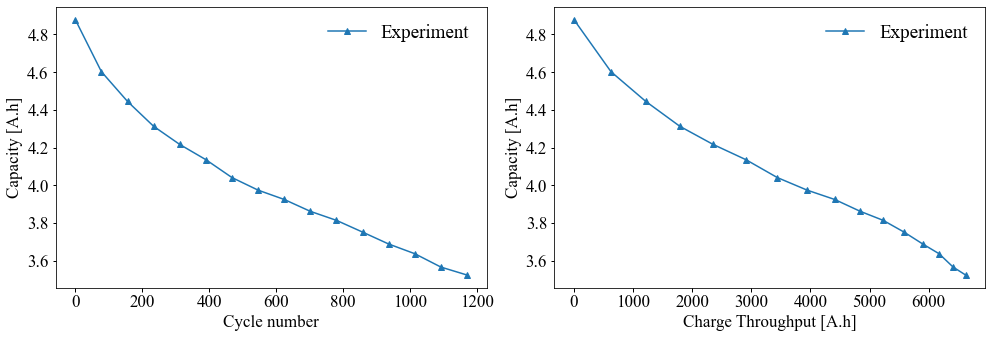

In [5]:
fs=17;Num_subplot = 2;
BasicPath = 'D:/OneDrive - Imperial College London/PhD Study/Imperial Study/Model/Pybamm Learning/SimDataSave/SolConsumed/';
Target = 'Test 16-1 Fit Niall Exp-5 Cell G/';

fig, axs = plt.subplots(1,Num_subplot, figsize=(14,4.8),tight_layout=True)
axs[0].plot(AgeCycles_G,       Cap_C_10_G       , '-^',  label='Experiment' )
axs[1].plot(CapThroup_G, Cap_C_10_G       , '-^',  label='Experiment')
axs[0].set_xlabel("Cycle number",   fontdict={'family':'Times New Roman','size':fs})
axs[1].set_xlabel("Charge Throughput [A.h]",   fontdict={'family':'Times New Roman','size':fs})
for i in range(0,Num_subplot):
    axs[i].set_ylabel("Capacity [A.h]",   fontdict={'family':'Times New Roman','size':fs})
    labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); [label.set_fontname('Times New Roman') for label in labels]
    axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
    axs[i].legend(prop={'family':'Times New Roman','size':fs+2},loc='best',frameon=False)
#axs[0].set_title("D_SEI = 1.3e-20",   fontdict={'family':'Times New Roman','size':fs+1})
#axs[1].set_title("Capacity loss to SEI",   fontdict={'family':'Times New Roman','size':fs+1})
#plt.savefig(BasicPath + Target+"Capacity loss - D_SEI = 1.9e-20 7% excessive electrolyte.png", dpi=600)